## Activity 1: Analyze Titanic Test Dataset
This dataset contains detailed information on the passengers aboard the Titanic. We can start be exploring the test dataset

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

test_df = pd.read_csv('titanic_data/train.csv')

In [121]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
test_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here's one way to display the distribution of the data, grouping based on survival and sex.

<AxesSubplot:xlabel='Survived,Sex'>

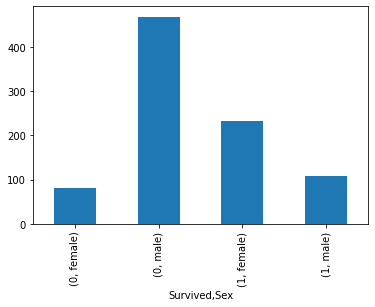

In [123]:
test_df.groupby(['Survived','Sex']).count()['PassengerId'].plot(kind='bar')

Choose another feature to plot the distribution of and plot it here

In [124]:
# YOUR CODE HERE

## Activity 2: Import and Analyze Models
We pre-trained two models based on the Titanic training dataset. Let's import these models and review their accuracy. Note that the difference between the models is one uses sex as a feature and one does not.

In [125]:
# we need to preprocess the data first based on the features that our model takes in as input
test_df['Age'] = test_df.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))
test_df = test_df.drop(['Cabin', 'Embarked', 'PassengerId', 'Name'], axis=1)
test_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,male,22.0,1,0,A/5 21171,7.2500
1,1,1,female,38.0,1,0,PC 17599,71.2833
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250
3,1,1,female,35.0,1,0,113803,53.1000
4,0,3,male,35.0,0,0,373450,8.0500


In [126]:
# we split the data into our inputs and the label
X = test_df.drop(['Survived'], axis=1)
y = test_df['Survived']



In [127]:
from sklearn.model_selection import train_test_split

# we want to extract a testing set 
_, X_test_original, _,y_test= train_test_split(X, y, test_size=0.2, random_state=42)
X_test_original


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
709,3,male,25.0,1,1,2661,15.2458
439,2,male,31.0,0,0,C.A. 18723,10.5000
840,3,male,20.0,0,0,SOTON/O2 3101287,7.9250
720,2,female,6.0,0,1,248727,33.0000
39,3,female,14.0,1,0,2651,11.2417
...,...,...,...,...,...,...,...
433,3,male,17.0,0,0,STON/O 2. 3101274,7.1250
773,3,male,25.0,0,0,2674,7.2250
25,3,female,38.0,1,5,347077,31.3875
84,2,female,17.0,0,0,SO/C 14885,10.5000


In [128]:
X = pd.get_dummies(X)
_, X_test, _,y_test= train_test_split(X, y, test_size=0.2, random_state=42)
X_test_unaware = X_test.drop(['Sex_female', 'Sex_male'], axis=1)
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
709,3,25.0,1,1,15.2458,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
439,2,31.0,0,0,10.5000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
840,3,20.0,0,0,7.9250,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
720,2,6.0,0,1,33.0000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,3,14.0,1,0,11.2417,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,3,17.0,0,0,7.1250,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
773,3,25.0,0,0,7.2250,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,3,38.0,1,5,31.3875,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,2,17.0,0,0,10.5000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
import pickle
# import the regular model
model = pickle.load(open('titanic_data/model.pkl','rb'))

# import the sex unaware model
model_unaware = pickle.load(open('titanic_data/model_unaware.pkl','rb'))

In [130]:
# let's use the models on our test data to get predicted labels
y_pred = model.predict(X_test)
y_pred_unaware = model_unaware.predict(X_test_unaware)

In [131]:
from sklearn.metrics import accuracy_score

# now we can compute the accuracy of those predictions
print('Accuracy Score for model trained with Sex as a feature', accuracy_score(y_pred, y_test))
print('Accuracy Score for model trained without Sex as a feature', accuracy_score(y_pred_unaware, y_test))

Accuracy Score for model trained with Sex as a feature 0.8100558659217877
Accuracy Score for model trained without Sex as a feature 0.7597765363128491


## Activity 3: Fairness Metrics Evaluation
Let's analyze the fairness of these model using the fairness metrics discussed in class.

In [132]:
# Merge data and predicted labels
merged_labels_and_predictions = pd.concat([X_test_original, pd.DataFrame(y_test, columns=['Survived']), pd.DataFrame(y_pred, columns=['Predicted Survival']), pd.DataFrame(y_pred_unaware, columns=['Predicted Survival Unaware'])], axis=1)

### Group Unaware

The first model (model) is not group unaware with respect to sex since sex is used as an input feature that the model is trained on.

The second model (model_unaware) is group unaware with respect to sex since the dataset it trains on does not include information about sex.

### Demographic Parity

In [133]:
# true labels
merged_labels_and_predictions.groupby("Sex")["Survived"].mean()

Sex
female    0.753623
male      0.200000
Name: Survived, dtype: float64

In [134]:
## Calculate Demographic Parity by Gender for the first model 
## Calculate positive rates by gender

# Positive Rates by Gender
merged_labels_and_predictions.groupby("Sex")["Predicted Survival"].mean()

Sex
female    0.333333
male      0.434783
Name: Predicted Survival, dtype: float64

In [135]:
## Calculate Demographic Parity by Gender for the sex unaware model 
## Calculate positive rates by gender

# Positive Rates by Gender
merged_labels_and_predictions.groupby("Sex")["Predicted Survival Unaware"].mean()

Sex
female    0.333333
male      0.260870
Name: Predicted Survival Unaware, dtype: float64

### Equal Opportunity and Other Metrics
Fill in the code for computing equal opportunity below. Feel free to explore any other fairness metrics that seem interesting to you! One thing to compute is true and false positive and true and false negative rates for each of the models to determine if there's anything unexpected here.

In [136]:
## Calculate Equal Opportunity
## Calculate true positive rates by gender


In [137]:
# YOUR CODE HERE

## Activity 4: Recommendation 
Based on the analysis and evaluations we've done above (both fairness and accuracy), would you recommend that one of these models is used in practice (i.e. in a situation where the model could be used to determine who is prioritized for safety in a similar siutation)

Justify your choice with evidence that you produced above.